# Final Project Vertically Driven Damped Planar Pendulum

Name: Manav Bilakhia

Date: 21st October 2022

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd
from mpl_toolkits.mplot3d import axes3d

# The Numerical Method

Here I have first defined my main computational tool that I will be using throughout, Runge-Kutta 4 (RK4)

In [2]:
def Rk4(F, x0, delta_t, N):
    t_n = np.array([0.0]) #part of the initial condition
    x_n = np.array([x0]) #part of the initial condition
    for i in range(1, N+1):  # looping for a given number of steps 
        t = t_n[i-1]+ delta_t # calculating the next t value 
        k1 = (F(x_n[i-1],t_n[i-1]))*delta_t #calculating preliminary value for later weighted average
        k2 = (F(x_n[i-1]+k1/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k3 = (F(x_n[i-1]+k2/2,t_n[i-1]+delta_t/2))*delta_t #calculating preliminary value for later weighted average
        k4 = (F(x_n[i-1]+k3,t_n[i-1]+delta_t))*delta_t #calculating preliminary value for later weighted average
        t_n = np.append(t_n, t) #storing t values in an array
        x = x_n[i-1]+(1/6)*(k1+2*k2+2*k3+k4) #next term of x using weighted average
        x_n = np.append(x_n,np.array([x]),axis = 0) #storing x values in an array and making sure the shape is consistent
    return x_n, t_n #returning the arrays

I will use the RK4 to understand and the vertically damped driven planar pendulum and solve its second order differential equation of motion (refer to the proposal for the derivation of the equation)
 
$$
\ddot{\theta} = -[\alpha - \beta \cos(\tau)]\sin(\theta) - \gamma \dot{\theta}
$$

where,

$$
\alpha = \frac{g}{L \omega^2} = \left(\frac{\text{natural frequency}}{\text{driving frequency}}\right)^2, \hspace{.75in} \beta = \frac{A}{L} = \left(\frac{\text{Amplitude of driving}}{\text{length of pendulum}}\right), \hspace{.75in} \gamma = \frac{\tilde{\gamma}}{\omega} = \left(\frac{\text{damping parameter}}{\text{driving frequency}}\right)
$$



# Checks

First and foremost, let us test our RK4 function on this system by setting the driving strength $\beta$, damping term $\gamma$to 0 and set $\alpha$ to 1 such that the system resonates thereby essentially making it a simple pendulum. As we graph this, we should expect the position vs time graph to look similar to sine function with its amplitude at $\frac{\pi}{2}$ with a time period of $2\pi$  We should also expect the Velocity vs time graph to be similar to a cosine curve with the same amplitude time period. Both of these graphs will complete 1 oscillation at $\frac{5\pi}{2}$ as I have introduced a phase shift of $\frac{\pi}{2}$

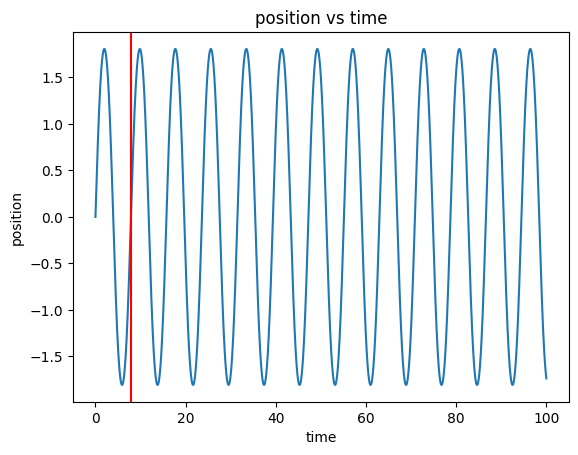

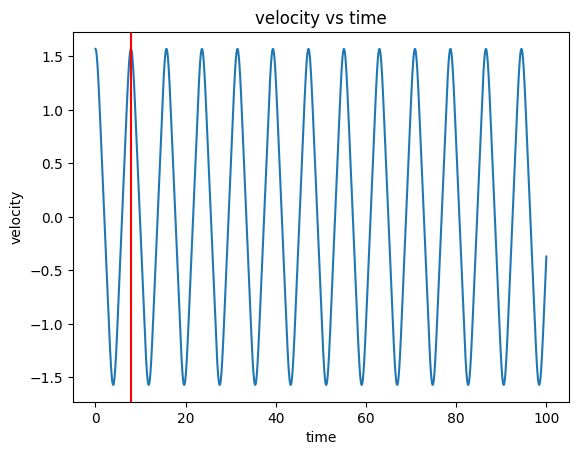

In [3]:
def f3(x_n,t): #mathematical function for the vertically driven damped pendulum
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = 1 #frequency     
beta = 0  #driving force
gamma = 0 #damping force
x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
v_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

plt.plot(t_n4, v_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("velocity") #ylabel
plt.title("velocity vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

The graphs behave exactly as we predicted in the situation where there is no damping and driving force. Hence we know that our function for the vertically driven damped planar pendulum works. 
Let us now add a some damping force and we should be able to see a sine curve with a gradually decreasing amplitude

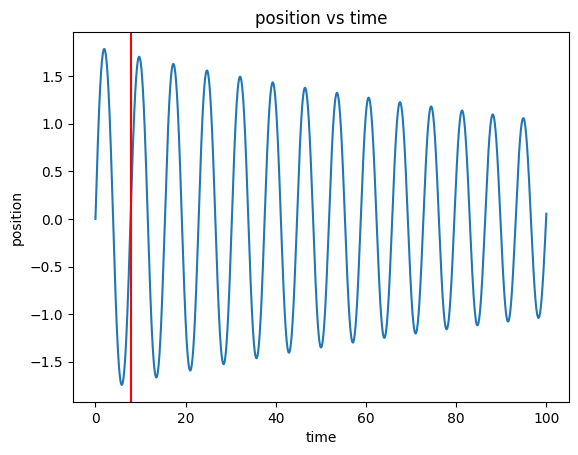

In [4]:
alpha = 1    #frequency                     
beta = 0     #driving force                                   
gamma = 0.01 #damping force                                 
x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.axvline(x = 2*math.pi+ math.pi/2, color = 'r', label = 't = $4x_{0}$') # marking the time period
plt.show()

We were able to predict the behavior again which means that the damping part of our equation works. The next thing we will check is the driving force and how it counters the damping. The values $\alpha = 0.5, \beta = 0.1, \gamma = 0.03$ correspond to the stability of the downward state for the system. We will not plot the position vs time graph for these parameters. 

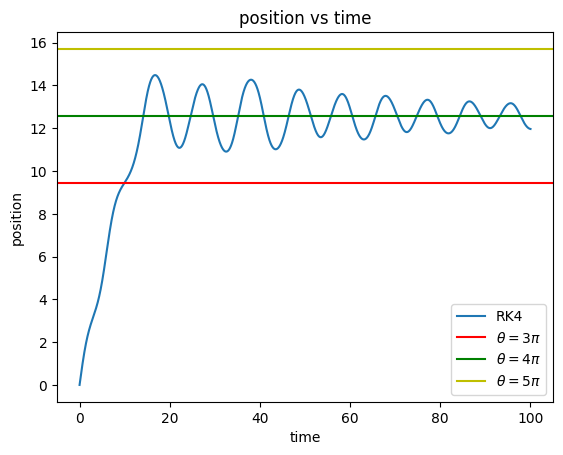

In [12]:
alpha = 0.5  #frequency                                  
beta = 0.1   #driving force                          
gamma = 0.03 #damping force                    

x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.axhline(y = 3*math.pi, color = 'r', linestyle = '-',label = "$\\theta = 3\\pi$")
plt.axhline(y = 4*math.pi, color = 'g', linestyle = '-',label = "$\\theta = 4\\pi$")
plt.axhline(y = 5*math.pi, color = 'y', linestyle = '-',label = "$\\theta = 5\\pi$")
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.legend()
plt.show()

In the plot above, I have changes the initial conditions such that there is a very big transient after which the plot seems to settle into its normal sinusoidal form with the amplitude almost being the same for all the other peaks outside of the transient. It is also worth noting that the pendulum dies down at around $4\pi$ as the pendulum swung around two complete circles before settling down. 


I shall now set the values of $\alpha = -0.1, \beta = 0.545, \gamma = 0.08$. These values correspond to a stable configuration for the upside-down pendulum. Since The driving force is so much more higher than the damping force, We should see the pendulum moving in circles instead of oscillating back and forth

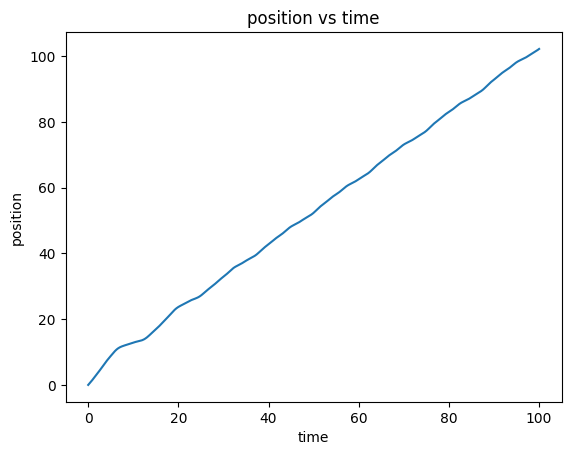

In [6]:
alpha = -0.1  #frequency                             
beta = 0.545  #driving force                               
gamma = 0.08  #damping force                                  

x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.show()

As expected we see that the pendulum does not settle down but instead keeps on going in circles.

I shall now set the values of $\alpha = 0.02, \beta = 0.35, \gamma = 0.03$.  we have stability for both
the upward and downward position of the pendulum. We should again expect the pendulum to go in circles instead of oscillating 

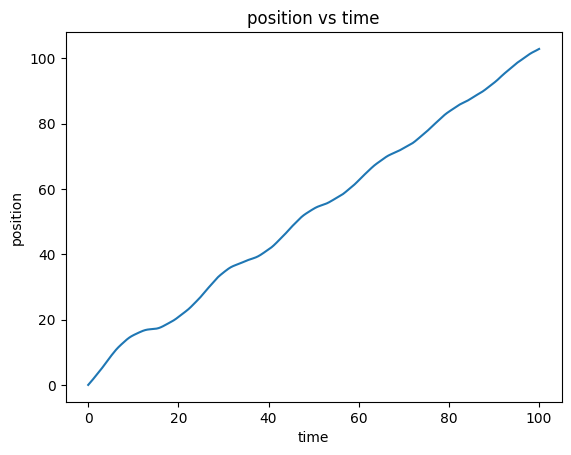

In [7]:
alpha = 0.02 #frequency                                 
beta = 0.35  #driving force                        
gamma = 0.03 #damping force                         

x_n4, t_n4 = Rk4(f3, [0,math.pi/2], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(t_n4, x_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.xlabel("time") #xlabel
plt.ylabel("position") #ylabel
plt.title("position vs time") #title
plt.show()

As expected we see that the pendulum does not settle down but instead keeps on going in circles. 

So far, the pendulum has behaved in the exact predicted manner which suggests that our RK4 method and our equation of motion hold true. 

# Things I was supposed to submit this week:

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma = 0$ it resembles a actual never dying pendulum. 

Implement basic RK4 for this equation and check if with $\alpha = 1, \beta = 0, \gamma > 0$ it resembles a actual dying pendulum.

Look further into attractors and basin of attractions to understand these jargons more and from other readings, find out values for  $\alpha, \beta, \gamma $ where they show interesting behavior. 

I have performed checks to understand the behavior and make sure that the code that I have written is correct. I was not able to get a better insight into attractors and basin of attractions. Hence I have started working on phase diagrams. While I do not completely understand the physics behind it, the code is partially ready.

While I have coded the phase diagrams at a different interesting initial conditions. I still do not understand the physics behind it.

# Phase Diagrams (Incomplete section)

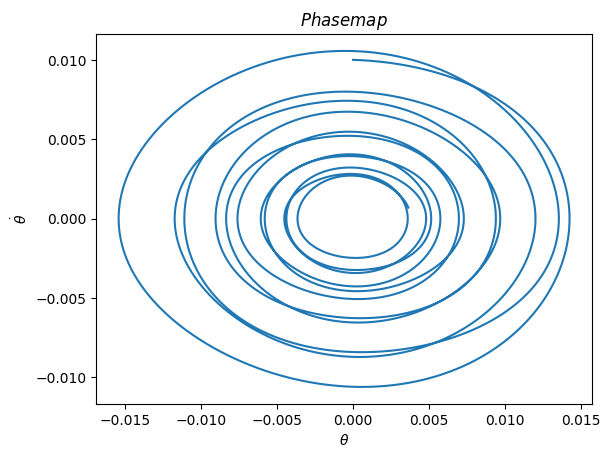

In [8]:
alpha = 0.5
beta = 0.1
gamma = 0.03

x_n4, t_n4 = Rk4(f3, [0.0,0.01], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("$Phase map$") #title
plt.show()

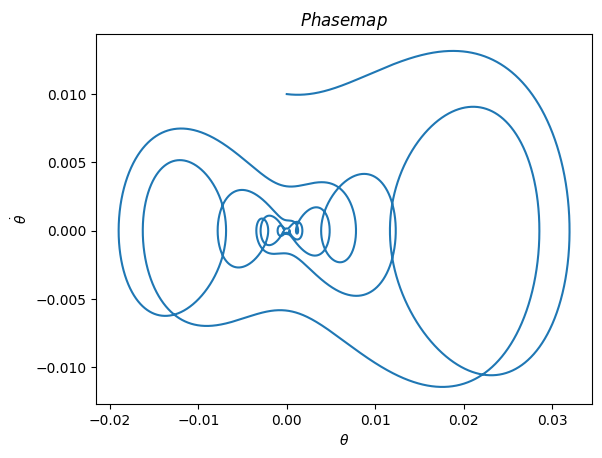

In [9]:
def f3(x_n,t):
    return np.array([x_n[1],-(alpha-(beta * np.cos(t))) * np.sin(x_n[0]) - gamma*x_n[1]])
alpha = -0.1
beta = 0.545
gamma = 0.08

x_n4, t_n4 = Rk4(f3, [0.0,0.01], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("$Phase map$") #title
plt.show()

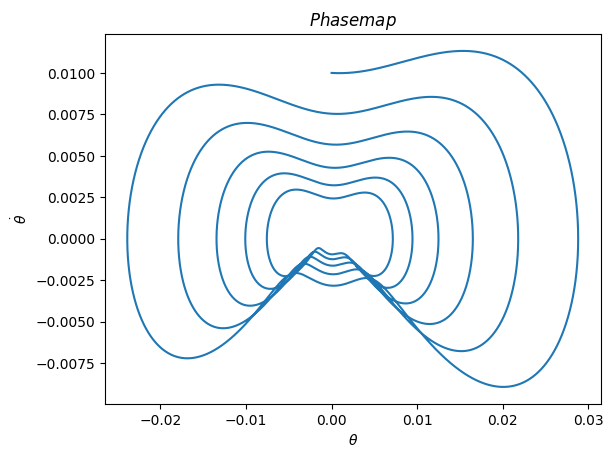

In [10]:
alpha = 0.02
beta = 0.35
gamma = 0.03

x_n4, t_n4 = Rk4(f3, [0.0,0.01], 0.001, 100000) #using RK4 method

x_vals4 = np.array([x_n4[i][0]for i in range (len (x_n4))])# getting position vals from the meshed list
y_vals4 = np.array([x_n4[i][1]for i in range (len (x_n4))])# getting position vals from the meshed list

plt.plot(x_vals4, y_vals4, label = "RK4") #calculating and plotting the difference between analytical soln and RK4 soln
plt.ylabel("$\\dot{\\theta}$") #x axis
plt.xlabel("$\\theta$") # yaxis
plt.title ("$Phase map$") #title
plt.show()

# Aims for next week

Have a better understanding of phase diagrams and the physics behind those

Read through the lecture notes provided to understand attractors, basin of attraction and phase diagrams. 

Finish the incomplete section on phasemaps along with the physics behind it. 